# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Sammie Bever
https://github.com/s520250/BeverModule6Assignment1

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

# Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
from bs4 import BeautifulSoup

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text

import pickle
with open('headlights.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

# Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
with open('headlights.pkl', 'rb') as f:
    article_html = pickle.load(f)

headlights = BeautifulSoup(article_html, 'html5lib')

article_content = headlights.find('article')

print(article_content.get_text())


    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

# Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [3]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# get rid of whitespaces and punctuation
def we_care_about(token):
    return not (token.is_space or token.is_punct)

interesting_tokens = [token for token in doc if we_care_about(token)]

# count the most frequent terms
from collections import Counter
word_freq = Counter(map(str,interesting_tokens))

# remove stopwords
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# converted to lower case, counted tokens, and printed list
interesting_tokens = [str(token).lower() for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print("Most Common Tokens with Counts:", word_freq.most_common(5))

# store top 5 tokens in a set
top5tokens = set()
for token, freq in word_freq.most_common(5):
    top5tokens.add(token)
print("Most Common Tokens:", top5tokens)

Most Common Tokens with Counts: [('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]
Most Common Tokens: {'technology', 'headlights', 'led', 'laser', 'headlight'}


# Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
# Changed to lemmas, lower case, counted lemmas, and printed list
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print("Most Common Lemmas:", lemma_freq.most_common(5))

# store top 5 lemmas in a set
top5lemmas = set()
for token, freq in lemma_freq.most_common(5):
    top5lemmas.add(token)
print("Most Common Lemmas:", top5lemmas)

Most Common Lemmas: [('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]
Most Common Lemmas: {'technology', 'led', 'laser', 'headlight', 'beam'}


# Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [5]:
# print top5tokens and top5lemmas for reference
print("Tokens",top5tokens)
print("Lemmas",top5lemmas)

Tokens {'technology', 'headlights', 'led', 'laser', 'headlight'}
Lemmas {'technology', 'led', 'laser', 'headlight', 'beam'}


In [6]:
# score sentence by token
print("Interesting or Top 5 Tokens:",top5tokens)
    
def score_sentence_by_token(sentence: int, doc: doc, top5tokens: list)->float:
    count = 0
    words = 0
    sentences = list(doc.sents)
    for token in sentences[sentence]:
        if not(token.is_space or token.is_punct):
            words += 1
        if token.text.lower() in top5tokens:
            count += 1
    return count/words

print('Score sentence by token:',score_sentence_by_token(2, doc, list(top5tokens)[0:5]))

Interesting or Top 5 Tokens: {'technology', 'headlights', 'led', 'laser', 'headlight'}
Score sentence by token: 0.09523809523809523


In [7]:
#score sentence by lemmas
print("Interesting or Top 5 Tokens:",top5lemmas)
def score_sentence_by_lemma(sentence: int, doc: doc, top5lemmas: list)->float:
    count = 0
    words = 0
    sentences = list(doc.sents)
    for lemma in sentences[sentence]:
        if not(lemma.is_space or lemma.is_punct):
            words += 1
        if lemma.text.lower() in top5lemmas:
            count += 1
    return count/words

print('Score sentence by lemma:',score_sentence_by_lemma(2, doc, list(top5lemmas)[0:5]))

Interesting or Top 5 Tokens: {'technology', 'led', 'laser', 'headlight', 'beam'}
Score sentence by lemma: 0.047619047619047616


# Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[0, 0.16666666666666666, 0.09523809523809523, 0.0, 0.0, 0.038461538461538464, 0.1, 1.0, 0.25, 0.13043478260869565, 0.0, 0.14285714285714285, 0.25, 0.0, 0.045454545454545456, 0.2222222222222222, 0.0, 0.1875, 0.15, 0.09090909090909091, 0.07692307692307693, 0.05263157894736842, 0.0, 0.045454545454545456, 0.07407407407407407, 0.038461538461538464, 0.0, 0.03333333333333333, 0.29411764705882354, 0.05555555555555555, 0.0, 0.14285714285714285, 0.15151515151515152, 0.05263157894736842, 0.05555555555555555, 0.12903225806451613, 0.0, 0.0, 0.0, 0.07142857142857142, 0.07142857142857142, 0.0, 0.0, 0.04, 0.05555555555555555, 0.125, 0.07317073170731707, 0.03225806451612903, 0.08333333333333333, 0.1111111111111111, 0.04, 0.12, 0.06060606060606061, 0.08695652173913043, 0.07407407407407407, 0.0, 0.0, 0.4]


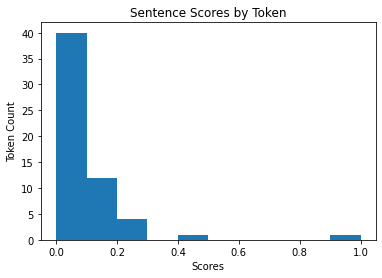

In [8]:
import matplotlib.pyplot as plt
sentences = list(doc.sents)

def sent_len(sent):
    count = 0
    for token in sent:
        if not(token.is_space or token.is_punct):
            count += 1
    return count

def score_sentence_by_token(sent, top5tokens):
    count = 0
    if sent_len(sent) == 0:
        return 0
    for token in sent:
        if str(token).lower() in top5tokens:
            count += 1
    return count/sent_len(sent)

# make a list of token scores
token_scores_list = []

for sentence in sentences:
    token_scores_list.append(score_sentence_by_token(sentence, top5tokens))
print(token_scores_list)

# plot histogram
plt.hist(token_scores_list)
plt.title('Sentence Scores by Token')
plt.ylabel('Token Count')
plt.xlabel('Scores')
plt.show()

# The most common range of scores (using tokens) appears to be 0.0 to 0.1

# Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[0, 0.08333333333333333, 0.047619047619047616, 0.0, 0.0, 0.038461538461538464, 0.1, 0.5, 0.25, 0.08695652173913043, 0.0, 0.07142857142857142, 0.1875, 0.0, 0.0, 0.1111111111111111, 0.0, 0.1875, 0.1, 0.09090909090909091, 0.11538461538461539, 0.05263157894736842, 0.0, 0.045454545454545456, 0.037037037037037035, 0.038461538461538464, 0.0, 0.03333333333333333, 0.29411764705882354, 0.05555555555555555, 0.0, 0.09523809523809523, 0.21212121212121213, 0.05263157894736842, 0.0, 0.12903225806451613, 0.0, 0.0, 0.0, 0.07142857142857142, 0.14285714285714285, 0.02857142857142857, 0.0, 0.0, 0.0, 0.125, 0.0975609756097561, 0.03225806451612903, 0.08333333333333333, 0.1111111111111111, 0.04, 0.04, 0.06060606060606061, 0.043478260869565216, 0.07407407407407407, 0.0, 0.0, 0.3333333333333333]


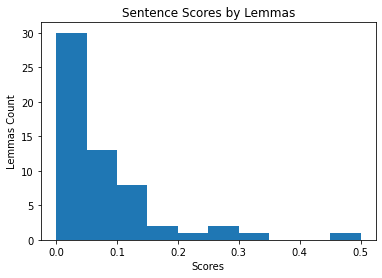

In [9]:
def score_sentence_by_lemmas(sent, top5lemmas):
    count = 0
    if sent_len(sent) == 0:
        return 0
    for token in sent:
        if str(token).lower() in top5lemmas:
            count += 1
    return count/sent_len(sent)

# make a list of lemma scores
lemmas_scores_list = []

for sentence in sentences:
    lemmas_scores_list.append(score_sentence_by_lemmas(sentence, top5lemmas))
print(lemmas_scores_list)

# plot histogram
plt.hist(lemmas_scores_list)
plt.title('Sentence Scores by Lemmas')
plt.ylabel('Lemmas Count')
plt.xlabel('Scores')
plt.show()

# The most common range of scores (using lemmas) appears to be 0.0 to 0.05

# Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

### Answer:

Looking at only nouns did not change our results by much because all of our most common tokens and lemmas appear to be nouns in this particular case. Looking at only nouns did not change our results at all for lemmas, aside from slightly different counts. However, it did change our results for tokens. For tokens, we lost the word "led" and replaced it with "beam." I am not sure if it is counting "led" as a noun when looking at tokens, but it does count "led" when looking at lemmas. It may think that "led" is a verb in this case. However, it does appear to give us slightly different counts for both.

In [10]:
# look at noun tokens
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

def nouns_we_care_about(token):
    for token in token:
        if token.pos_ == 'NOUN':
            return not (token.is_space or token.is_punct or token.is_stop)

interesting_noun_tokens = [str(token).lower() for token in doc if token.pos_ == 'NOUN']
noun_word_freq = Counter(map(str,interesting_noun_tokens))

# store top 5 tokens in a set
top5nountokens = set()
for token, freq in noun_word_freq.most_common(5):
    top5nountokens.add(token)

# print comparison of top 5 tokens vs top 5 NOUN tokens
print("Top 5 Tokens",word_freq.most_common(5))
print("Top 5 Noun Tokens", noun_word_freq.most_common(5))
print()




# look at noun lemmas
interesting_noun_lemmas = [token.lemma_.lower() for token in doc if token.pos_ == 'NOUN']
lemma_noun_freq = Counter(interesting_noun_lemmas)

# store top 5 lemmas in a set
top5nounlemmas = set()
for token, freq in lemma_noun_freq.most_common(5):
    top5nounlemmas.add(token)
    
# print comparison of top 5 lemmas vs top 5 NOUN lemmas
print()
print("Top 5 Lemmas",lemma_freq.most_common(5))
print("Top 5 Noun Lemmas", lemma_noun_freq.most_common(5))

# answer to question 8 in markdown cell above this cell

Top 5 Tokens [('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]
Top 5 Noun Tokens [('laser', 29), ('headlights', 17), ('technology', 10), ('headlight', 8), ('beam', 7)]


Top 5 Lemmas [('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]
Top 5 Noun Lemmas [('laser', 34), ('headlight', 25), ('beam', 12), ('led', 11), ('technology', 10)]
